# Validasi Data

Validasi data Case 

## Oleh Kelompok 9 :

    Kayla Nahda Muadzah_21343053
    Salsabilla Ahmad_21343072

<h3>Import data</h3>

<h4>Import pandas</h4> 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Reading the dataset from csv</h2>


Use the Pandas method <b>read_csv()</b> to load the data from the folder.


In [4]:
df = pd.read_excel("C:/Users/ASUS/Documents/Kayla's/Semester 4/Data Science/Big Data Covid-19 Korea/Validasi Data/Case.xlsx")
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37538621,126992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,3748208,126901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37508163,126884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37546061,126874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37679422,127044374


Use the method <b>head()</b> to display the first five rows of the dataframe.


In [3]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37538621,126992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,3748208,126901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37508163,126884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37546061,126874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37679422,127044374


In [5]:
df.dtypes

 case_id           int64
province          object
city              object
group               bool
infection_case    object
confirmed          int64
latitude          object
longitude         object
dtype: object

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "-".
We replace "-" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [9]:
import numpy as np

# replace "-" to NaN
df.replace("-", np.nan, inplace = True)
df.head(176)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37538621.0,126992652.0
1,1000002,Seoul,Gwanak-gu,True,Richway,119,3748208.0,126901384.0
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37508163.0,126884387.0
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37546061.0,126874209.0
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37679422.0,127044374.0
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,NaN,False,etc,20,NaN,NaN
170,7000001,Jeju-do,NaN,False,overseas inflow,14,NaN,NaN
171,7000002,Jeju-do,NaN,False,contact with patient,0,NaN,NaN
172,7000003,Jeju-do,NaN,False,etc,4,NaN,NaN


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [6]:
missing_data = df.isnull()
missing_data.head(176)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
169,False,False,True,False,False,False,True,True
170,False,False,True,False,False,False,True,True
171,False,False,True,False,False,False,True,True
172,False,False,True,False,False,False,True,True


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

 case_id
False    174
Name:  case_id, dtype: int64

province
False    174
Name: province, dtype: int64

city
False    121
True      53
Name: city, dtype: int64

group
False    174
Name: group, dtype: int64

infection_case
False    174
Name: infection_case, dtype: int64

confirmed
False    174
Name: confirmed, dtype: int64

latitude
True     109
False     65
Name: latitude, dtype: int64

longitude
True     109
False     65
Name: longitude, dtype: int64



or we can use this function to calculate Null value

In [8]:
df.isna().sum()

 case_id            0
province            0
city               53
group               0
infection_case      0
confirmed           0
latitude          109
longitude         109
dtype: int64

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"city": 53 missing data</li>
    <li>"latitude": 109 missing data</li>
    <li>"longitude": 109 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


In [10]:
avg_latitude=df['latitude'].astype('float').mean(axis=0)
print("Average of latitude:", avg_latitude)

Average of latitude: 34585882.41538461


In [11]:
avg_longitude=df['longitude'].astype('float').mean(axis=0)
print("Average of longitude:", avg_longitude)

Average of longitude: 118320207.09230769


In [12]:
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37538621.0,126992652.0
1,1000002,Seoul,Gwanak-gu,True,Richway,119,3748208.0,126901384.0
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37508163.0,126884387.0
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37546061.0,126874209.0
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37679422.0,127044374.0


In [13]:
df["latitude"].replace(np.nan, avg_latitude, inplace=True)

In [14]:
df["longitude"].replace(np.nan, avg_longitude, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [15]:
df['city_and_province'] = df['city'] + ', ' + df['province']
df['city_and_province'].value_counts()

from other city, Gyeonggi-do    9
from other city, Seoul          8
from other city, Gangwon-do     4
Gangnam-gu, Seoul               4
from other city, Incheon        4
                               ..
Dong-gu, Daegu                  1
Dong-gu, Gwangju                1
from other city, Gwangju        1
from other city, Sejong         1
from other city, Jeju-do        1
Name: city_and_province, Length: 65, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [16]:
df['city_and_province'] = df['city'] + ', ' + df['province']
df['city_and_province'].value_counts().idxmax()

'from other city, Gyeonggi-do'

# The replacement procedure is very similar to what we have seen previously:


In [17]:
df["city_and_province"].replace(np.nan, "from other city, Gyeonggi-do", inplace=True)

Finally, let's drop all rows that do not have price data:


In [18]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["latitude"], axis=0, inplace=True)
df.dropna(subset=["longitude"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [19]:
#check dimension of dataset
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude,city_and_province
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37538621.0,126992652.0,"Yongsan-gu, Seoul"
1,1000002,Seoul,Gwanak-gu,True,Richway,119,3748208.0,126901384.0,"Gwanak-gu, Seoul"
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37508163.0,126884387.0,"Guro-gu, Seoul"
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37546061.0,126874209.0,"Yangcheon-gu, Seoul"
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37679422.0,127044374.0,"Dobong-gu, Seoul"


Text(0.5, 1.0, 'city_and_province bins')

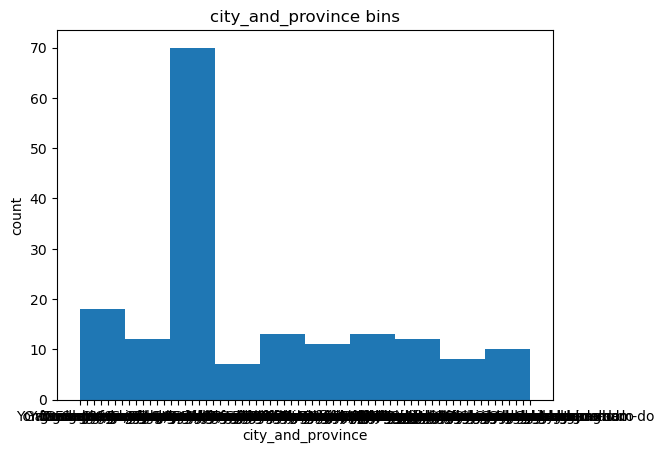

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["city_and_province"])

# set x/y labels and plot title
plt.pyplot.xlabel("city_and_province")
plt.pyplot.ylabel("count")
plt.pyplot.title("city_and_province bins")

In [21]:
df.to_csv('cleann_case.csv')